In [4]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from IPython import display
from tqdm import tqdm
import seaborn as sns

np.random.seed(34)

N_ITERS = 100000
H = 64
W = 64
J = 1
PLOT_INTERVAL = 1000

### Statistical values

##### Hamiltonian
$$
    H = - J \sum_{<ij>} s_i s_j - B \sum_i s_i
$$
- $<ij>$: a pair of sites $(i, j)$ which are nearest neighbours (next to each other).

##### Mean magnetization
$$
    \langle M \rangle = \langle \sum_i s_i \rangle
$$

##### Mean magnetization per spin
$$
    \langle m \rangle = \frac{1}{N} \langle \sum_i s_i \rangle
$$

##### Magnetic susceptibility
$$
    \frac{\partial \langle M \rangle}{\partial B} = \beta \left( \langle M^2 \rangle - \langle M \rangle^2 \right)
$$

##### Magnetic susceptibility per spin
$$
    \frac{\beta}{N} \left( \langle M^2 \rangle - \langle M \rangle^2 \right) = \beta N \left( \langle m^2 \rangle - \langle m \rangle^2 \right)
$$

##### Specific heat per spin
$$
    c = \frac{k \beta^2}{N} \left( \langle E^2 \rangle - \langle E \rangle^2 \right)
$$

In [39]:
np.random.seed(34)

sigma = np.random.choice((-1, 1), (H, W))
sigma

array([[ 1, -1, -1, ..., -1,  1, -1],
       [-1, -1,  1, ...,  1,  1, -1],
       [ 1, -1,  1, ...,  1,  1,  1],
       ...,
       [ 1,  1,  1, ...,  1, -1,  1],
       [-1, -1,  1, ...,  1,  1,  1],
       [-1, -1,  1, ...,  1, -1,  1]])

In [40]:
def compute_energy(sigma):
    sigma_u = np.r_[sigma[1:, :], sigma[:1, :]]
    sigma_d = np.r_[sigma[-1:, :], sigma[:-1, :]]
    sigma_l = np.c_[sigma[:, 1:], sigma[:, :1]]
    sigma_r = np.c_[sigma[:, -1:], sigma[:, :-1]]
    return - J * np.sum(sigma * (sigma_u + sigma_d + sigma_l + sigma_r)) / 2

In [62]:
def compute_magnetization(sigma):
    return np.sum(sigma)

### Metropolis Algorithm

1. Set the temperature $T$ ($\beta = \frac{1}{T}$).
2. Initialize the spin configuration $s$ at random.
3. Iterate the following operations until convergence.
    1. Pick a single spin $k$ randomly.
    2. Consider the new state $\nu$ after spin $k$ is flipped, and compute the energy difference between the current state $\mu$ and the new state $\nu$.
        $$\Delta E = E_{\mu} - E_{\nu} = 2 J s_k^{\mu} \sum_{i \hspace{1mm} \text{n.n. to} \hspace{1mm} k} s_i^{\mu}$$
        - n.n.: nearest neighbours
    3. Flip the spin $k$ under the following condition.
    $$
        A(\mu \rightarrow \nu) =
        \begin{cases}
            e^{- \beta \left(E_{\nu} - E_{\mu}\right)} \hspace{4mm} \text{if} \, E_{\nu} - E_{\mu} > 0 \\
            1 \hspace{20mm} \text{otherwise}
        \end{cases}
    $$

Reference: M. E. J. Newman & G. T. Barkema, "Monte Carlo Methods in Statistical Physics", Oxford University Press, 1999

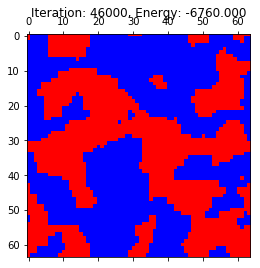

In [64]:
np.random.seed(34)

t = 1.0
beta = 1/t

# Initial state
sigma = np.random.choice((-1, 1), (H, W))
energy = compute_energy(sigma)

# Plot (heat map)
img = plt.matshow(sigma, cmap='bwr')
display.display(plt.gcf())
display.clear_output(wait=True)

def compute_energy_diff(sigma, h, w):
    return 2 * J * sigma[h, w] * (sigma[(h-1)%H, w] + sigma[(h+1)%H, w] + sigma[h, (w-1)%W] + sigma[h, (w+1)%W])

# Iteration
for itr in range(N_ITERS):
    try:
        h = np.random.randint(0, H)
        w = np.random.randint(0, W)
        
        # Compute the energy differnce between the current state and the next state
        energy_diff = compute_energy_diff(sigma, h, w)
        
        # Flip spin
        if energy_diff <= 0:
            sigma[h, w] *= -1
        elif np.random.rand() < np.exp(- beta * energy_diff):
            sigma[h, w] *= -1
        
        # Compute statistical values
        energy = compute_energy(sigma)
        
        # Plot
        if (itr + 1) % PLOT_INTERVAL == 0:
            img.set_data(sigma)
            plt.title('Iteration: {}, Energy: {:.3f}'.format(itr + 1, energy))
            display.display(plt.gcf())
            display.clear_output(wait=True)
    except KeyboardInterrupt:
        break